In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/Users/admin/Desktop/milk_production.csv", parse_dates = True, index_col = "date")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pounds_per_cow  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [5]:
import matplotlib.pyplot as plt

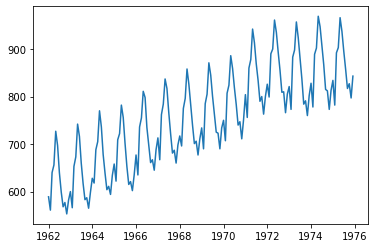

In [6]:
plt.plot(df["pounds_per_cow"])
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pounds_per_cow  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [8]:
#this data is seasonal and is non -stationary
#so we will use what is called SARIMAX 

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(df)

(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [11]:
#p value is 0.607 we can accept the null hypothesis that the data is non stationary

In [12]:
#to make it stationary we will difference it

In [13]:
df_diff = df.diff().dropna()

In [14]:
adfuller(df_diff)

(-3.0549955586531095,
 0.0300680040017824,
 14,
 152,
 {'1%': -3.474120870218417,
  '5%': -2.880749791423677,
  '10%': -2.5770126333102494},
 1107.6745114331075)

In [15]:
#you can see that the P value is very low so we can reject the null hypothesis that data is non stationary

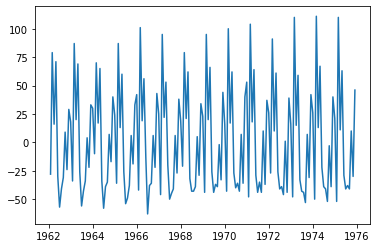

In [16]:
plt.plot(df_diff)
plt.show()

In [17]:
# we could also takethelognp.log(df)
#Takethesquarerootnp.sqrt(df)
#Taketheproportionalchangedf.shift(1)/df


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

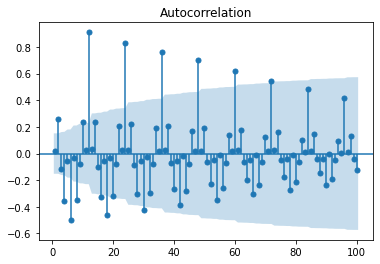

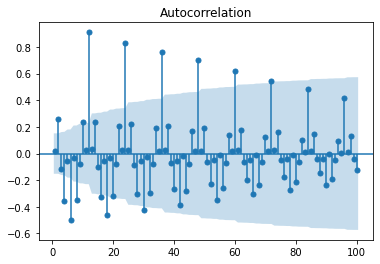

In [19]:
plot_acf(df_diff, lags = 100, zero =False)

In [20]:
#seasonality check at 12 periods

In [21]:
#here both model tails so ARMA model is there with (8,1,8)

In [22]:
#so seasonal trend is after 12 periods
#so we diff the seasonal cycle

In [23]:
df_season = df.diff(12).dropna()

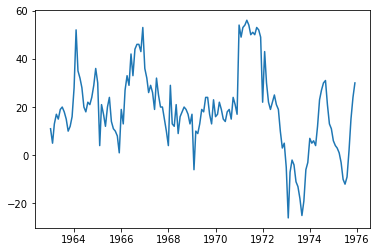

In [24]:
plt.plot(df_season)
plt.show()

In [25]:
adfuller(df_season)

(-2.335419314359397,
 0.16079880527711382,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 983.7689056486297)

In [26]:
#since data looked seasonal we took the seasonal difference and also now P value is small. So data is now stationary


## Auto Regressive Model
![image.png](attachment:AR_model.png)


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


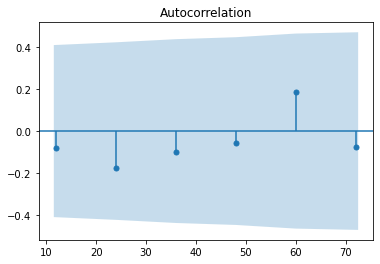

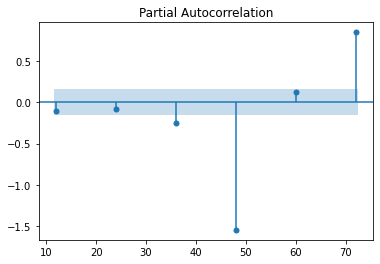

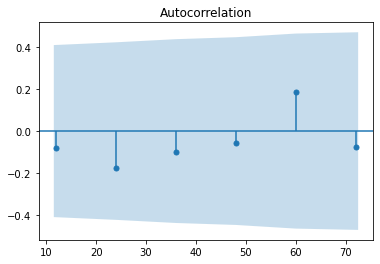

In [27]:
plot_pacf(df_season, lags = [12,24,36,48,60,72], zero =False)
plot_acf(df_season, lags = [12,24,36,48,60,72], zero =False)

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [28]:
#AR model if ACF tails off and PACF cuts off at lag p
#MA model if ACF cuts off at q and PACF tails off 
#ARMA if both tails off

In [29]:
#looking at groph it is SARIMAX model (0,1,)(0,1,,12) 

In [30]:
#we have an automated way to check for this model selection

In [31]:
pip install pmdarima 

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pmdarima as pm

In [33]:
results = pm.auto_arima(df,seasonal = True, m =12, d =1, D = 1, information_criterion = "bic", trace = True,  error_action = "ignore", n_fits =200, stepwise = True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=1091.526, Time=1.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1123.012, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=1090.714, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=1075.427, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1121.082, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=1080.203, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : BIC=1080.150, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=1091.253, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : BIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(0,1,1)[12]             : BIC=1078.367, Time=0.06 sec
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=1080.238, Time=0.14 sec
 ARIMA(0,1,2)(0,1,1)[12]             : BIC=1079.970, Time=0.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=1075.337, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=1120.932, Time=0.03 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -530.104
Date:                              Thu, 17 Jun 2021   AIC                           1066.207
Time:                                      13:14:21   BIC                           1075.337
Sample:                                           0   HQIC                          1069.916
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2253      0.077     -2.925      0.003      -0.376      -0.074
ma.S.L12      -0.6190      0.070     -8.825      0.000      -0.757      -0.482
sigma2        52.6908      4.897     10.759      0.000      43.093      62.289
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                35.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.74
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

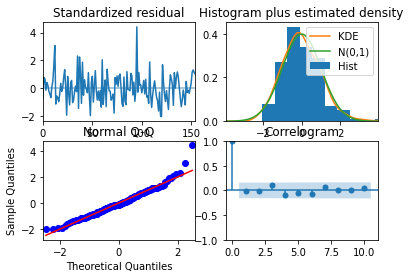

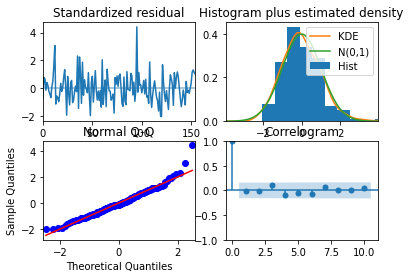

In [35]:
results.plot_diagnostics()

In [36]:
from pmdarima.model_selection import train_test_split

In [37]:
train, test = train_test_split(df, test_size=0.1)

In [38]:
test.shape

(17, 1)

In [39]:
prediction = pd.DataFrame(results.predict(n_periods = 17), test.index)
prediction.columns = ["predicted_sales"]
test["predicted_sales"] = prediction

<ipython-input-39-0aedb692e27e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sales"] = prediction


In [40]:
from sklearn.metrics import r2_score
r2_score(test["pounds_per_cow"], test["predicted_sales"])

-3.646676154119157

In [41]:
prediction.columns = ["predicted_sales"]

In [42]:
prediction.head()

,predicted_sales
date,
1974-08-01,865.349740
1974-09-01,818.387707
1974-10-01,925.019489
1974-11-01,938.096591
1974-12-01,1001.238547


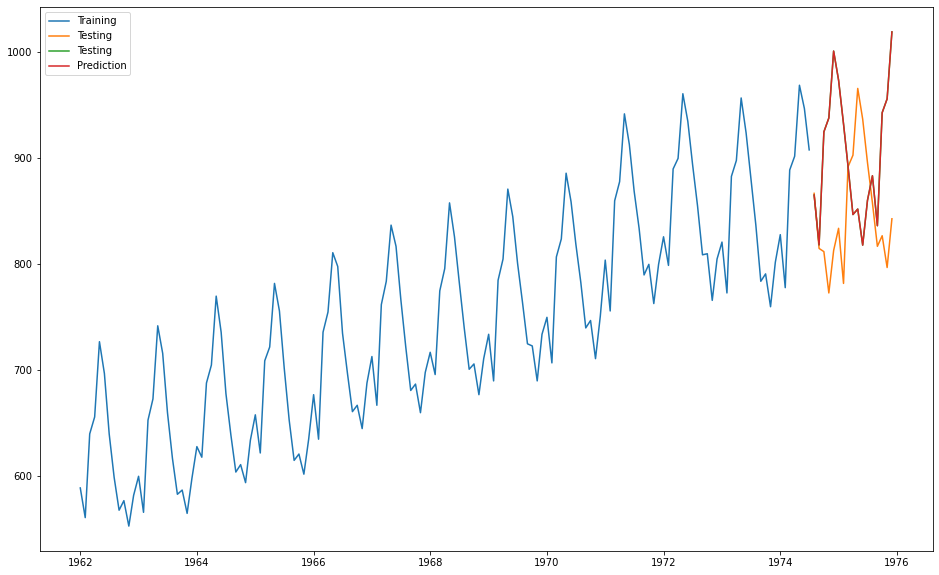

In [43]:
plt.figure(figsize = (16,10))
plt.plot(train,label = "Training")
plt.plot(test, label = "Testing")
plt.plot(prediction, label = "Prediction")
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

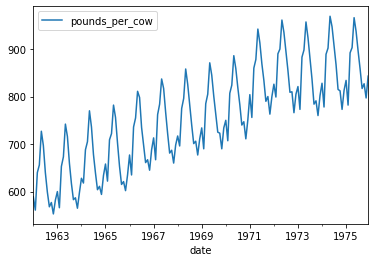

In [58]:
df.plot()
# problem is becuase of the last leg in the sales


In [44]:
df.shape

(168, 1)

In [45]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [46]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [47]:
future_datest_df.tail()

,pounds_per_cow
1977-07-01,NaN
1977-08-01,NaN
1977-09-01,NaN
1977-10-01,NaN
1977-11-01,NaN


In [48]:
future_datest_df.shape

(23, 1)

In [49]:
future_datest_df['forecast'] = results.predict(n_periods = 23, dynamic= True)  

In [50]:
future_df=pd.concat([df,future_datest_df])

In [52]:
future_df

,pounds_per_cow,forecast
1962-01-01,589.0,NaN
1962-02-01,561.0,NaN
1962-03-01,640.0,NaN
1962-04-01,656.0,NaN
1962-05-01,727.0,NaN
...,...,...
1977-07-01,NaN,950.570617
1977-08-01,NaN,910.982068
1977-09-01,NaN,865.087359
1977-10-01,NaN,870.259119


<AxesSubplot:>

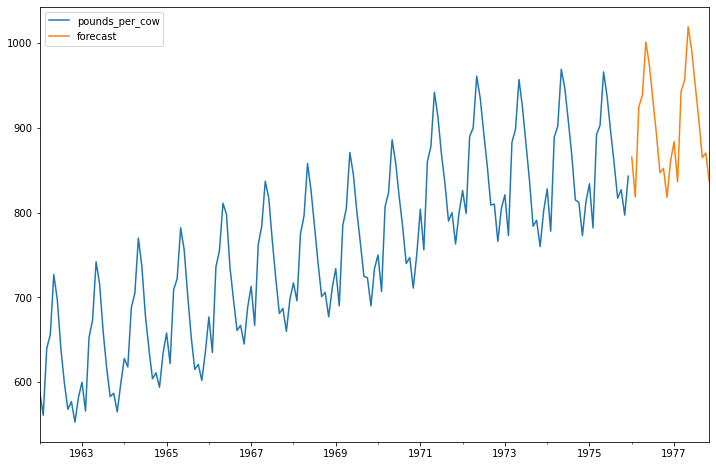

In [53]:
future_df[["pounds_per_cow", "forecast"]].plot(figsize=(12, 8)) 